In [1]:
import numpy as np # for Array 
import pandas as pd # for DataFrames

import matplotlib.pyplot as plt # to plot
import scipy.stats as stats # to calculate spearman correlation

# Analysis MTL-Approach

In this analysis, we examine the drugs with the greatest differences in MSE and investigate how these differences correlate with the number of interactions.
- Does a high number of interactions influence the median MSE?
----

### Which drugs have the highest median MSE values?

In [22]:
# Load MSE files with baseline and naive approach
task_mses = np.loadtxt("./results/MTL/task_mses.csv", delimiter=",", skiprows=1)  # skip header
task_mses_gene = np.loadtxt("./results/MTL/naive/task_mses_gene.csv", delimiter=",", skiprows=1)  # skip header
task_mses_pathway = np.loadtxt("./results/MTL/naive/task_mses_pathway.csv", delimiter=",", skiprows=1)  # skip header
task_mses_combination = np.loadtxt("./results/MTL/naive/task_mses_combination.csv", delimiter=",", skiprows=1)  # skip header

# Get index over drug names
drug_list = pd.read_csv("./data/cl_y_test_o_k1.csv", index_col=0)
drug_list = drug_list.columns

In [23]:
# Create an DataFrame with all results
df_mse = pd.DataFrame({
    "Drug": drug_list,
    "MSE_baseline": task_mses,
    "MSE_gene": task_mses_gene,
    "MSE_pathway": task_mses_pathway,
    "MSE_combination": task_mses_combination
})

# Set "Drug"-column as index 
df_mse.set_index("Drug", inplace=True)

In [24]:
# Sort each column with Drugs with highest MSE 
for col in df_mse.columns:
    df_mse = df_mse.sort_values(by=col, ascending=False)

{'Vincristine', 'JQ1', 'Gemcitabine', 'AZD5582', 'BMS-754807', 'Bleomycin', 'Docetaxel', 'Mitoxantrone', 'Alisertib', 'AZD5991'}
Gemeinsame Top-10-Drugs über alle Ansätze: 10 gefunden


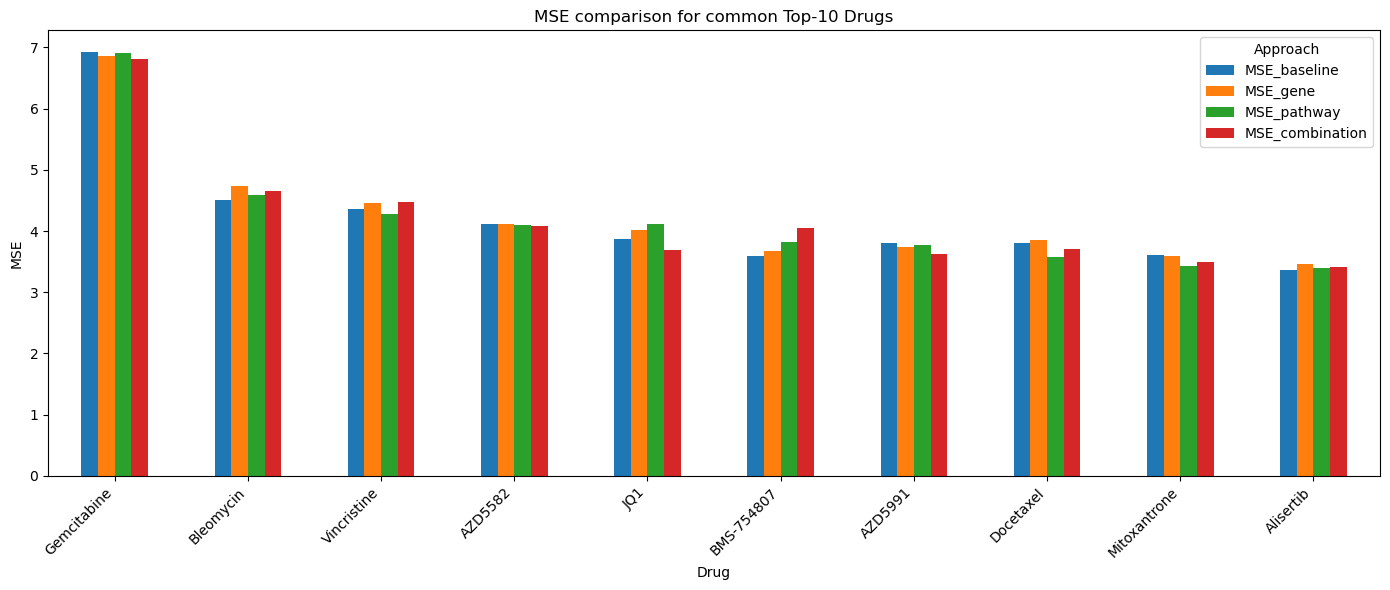

In [25]:
# Anzahl der Top-N Drugs pro Ansatz
top_n = 10

# 1. Finde die Top-N Drugs mit höchstem MSE pro Ansatz
top_drug_sets = []
for col in df_mse.columns:
    top_drugs = df_mse[col].sort_values(ascending=False).head(top_n).index
    top_drug_sets.append(set(top_drugs))

# 2. Schnittmenge aller Top-N-Drogensätze
common_top_drugs = set.intersection(*top_drug_sets)
print(common_top_drugs)
print(f"Gemeinsame Top-{top_n}-Drugs über alle Ansätze: {len(common_top_drugs)} gefunden")

# 3. Filtere den DataFrame auf diese Drugs
df_common = df_mse.loc[list(common_top_drugs)]

# 4. Sortiere nach einem festen Kriterium (z. B. Mittelwert)
df_common = df_common.loc[df_common.mean(axis=1).sort_values(ascending=False).index]

# 5. Plotten
df_common.plot(kind="bar", figsize=(14, 6))
plt.title(f"MSE comparison for common Top-{top_n} Drugs")
plt.ylabel("MSE")
plt.xlabel("Drug")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Approach")
plt.tight_layout()
plt.show()


{'Docetaxel', 'AZD5582', 'BMS-754807', 'AZD5991', 'Mitoxantrone', 'JQ1', 'Vincristine', 'Bleomycin', 'Gemcitabine', 'Alisertib'}


In [26]:
statistics = pd.read_csv('./drug_statistics.csv', index_col=0)
selected_drugs = {'Docetaxel', 'AZD5582', 'BMS-754807', 'AZD5991', 'Mitoxantrone', 'JQ1', 'Vincristine', 'Bleomycin', 'Gemcitabine', 'Alisertib'}
statistics_subset = statistics[statistics.index.isin(selected_drugs)]

In [27]:
statistics_subset

,Tested_Samples,Mean,Median,Std,Variance,Skewness,CV
Drug,,,,,,,
Docetaxel,263,-3.471703,-4.044488,2.285939,5.225517,0.662730,-0.658449
Gemcitabine,252,-0.448804,-1.001651,3.269576,10.690129,0.158158,-7.285087
Alisertib,242,1.527927,1.661884,2.369802,5.615961,-0.164276,1.550991
Mitoxantrone,238,0.301861,0.261782,2.305457,5.315134,0.144035,7.637469
AZD5991,239,3.555350,4.318087,2.862550,8.194192,-0.747668,0.805139
Vincristine,238,-1.743570,-2.284810,2.744564,7.532634,0.547991,-1.574106
AZD5582,234,2.157083,1.931485,2.194600,4.816268,-0.431702,1.017392
JQ1,16,2.564470,3.038926,1.827445,3.339554,-0.630055,0.712601
BMS-754807,15,0.945185,1.273567,1.879175,3.531300,-0.552742,1.988157


In [28]:
response_1 = pd.read_csv("./data/cl_y_test_o_k1.csv", index_col=0)
response_2 = pd.read_csv("./data/cl_y_test_o_k2.csv", index_col=0)
response_3 = pd.read_csv("./data/cl_y_test_o_k3.csv", index_col=0)
response_data = pd.concat([response_1, response_2, response_3], axis=0, ignore_index=False)

In [29]:
# Anzahl der Nicht-NaN-Werte in jeder Spalte
tozasertib_count = response_data["JQ1"].notna().sum()
bms_count = response_data["BMS-754807"].notna().sum()

print(f"Anzahl Werte in 'JQ1': {tozasertib_count}")
print(f"Anzahl Werte in 'BMS-754807': {bms_count}")


Anzahl Werte in 'JQ1': 48
Anzahl Werte in 'BMS-754807': 45


### How many interactions do the drugs with the highest MSE have?

In [30]:
dgi_matrix = pd.read_csv("./data/global_gene_interaction_matrix.csv", index_col=0).astype(np.float32)
pathway_matrix = pd.read_csv("./data/drug_pathway_binary_matrix.csv", index_col=0).astype(np.float32)

In [31]:
# Number of interactions per drug (rows)
dgi_interaction_counts = dgi_matrix.sum(axis=1)
pathway_interaction_counts = pathway_matrix.sum(axis=1)

# Add interactions as new columns to the MSE DataFrame
df_mse["DGI_interactions"] = dgi_interaction_counts
df_mse["Pathway_interactions"] = pathway_interaction_counts

In [17]:
# Plot (Number of interactions vs. mse)

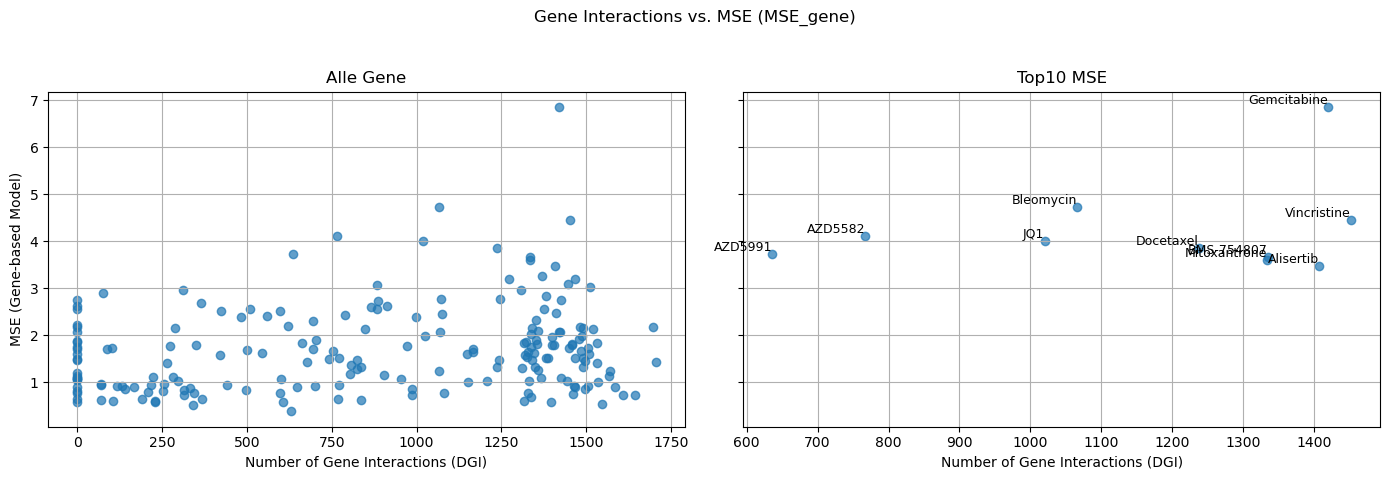

In [24]:
import matplotlib.pyplot as plt

# Liste der gewünschten Drugs
selected_drugs = {'Docetaxel', 'AZD5582', 'BMS-754807', 'AZD5991',
                  'Mitoxantrone', 'JQ1', 'Vincristine', 'Bleomycin',
                  'Gemcitabine', 'Alisertib'}

# Filtere den DataFrame auf diese Drugs
df_selected = df_mse[df_mse.index.isin(selected_drugs)]

# Erstelle nebeneinanderliegende Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot 1: Alle Daten
axes[0].scatter(df_mse["DGI_interactions"], df_mse["MSE_gene"], alpha=0.7)
axes[0].set_title("Alle Gene")
axes[0].set_xlabel("Number of Gene Interactions (DGI)")
axes[0].set_ylabel("MSE (Gene-based Model)")
axes[0].grid(True)

# Plot 2: Nur ausgewählte Drugs, mit Beschriftung
axes[1].scatter(df_selected["DGI_interactions"], df_selected["MSE_gene"], alpha=0.7)
for idx, row in df_selected.iterrows():
    axes[1].text(row['DGI_interactions'], row['MSE_gene'], str(idx),
                 fontsize=9, ha='right', va='bottom')
axes[1].set_title("Top10 MSE")
axes[1].set_xlabel("Number of Gene Interactions (DGI)")
axes[1].grid(True)

# Layout und Anzeige
plt.suptitle("Gene Interactions vs. MSE (MSE_gene)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Biological ways

                     Gene_set                                               Term  Overlap       P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  Combined Score                                              Genes
0  GO_Biological_Process_2023               Protein Phosphorylation (GO:0006468)  112/500  1.131571e-79      3.683264e-76            0                     0   16.026894     2913.378610  ATF2;RPS6KA3;STK11;AKT2;PRKACG;CHEK2;CHEK1;RPS...
1  GO_Biological_Process_2023  Regulation Of Cell Population Proliferation (G...  120/766  8.316388e-67      1.353492e-63            0                     0   10.416257     1584.885317  CSF1;IRS1;IRS2;FGF2;ETS1;FGF3;FGF4;CRKL;FGF5;F...
2  GO_Biological_Process_2023  Transmembrane Receptor Protein Tyrosine Kinase...   80/284  8.966862e-65      9.729046e-62            0                     0   20.116503     2966.671101  RET;GSK3B;GSK3A;FLT1;CSF1;IRS1;IRS2;FGF2;FGF3;...
3  GO_Biological_Process_2023       Regulation Of Apopto

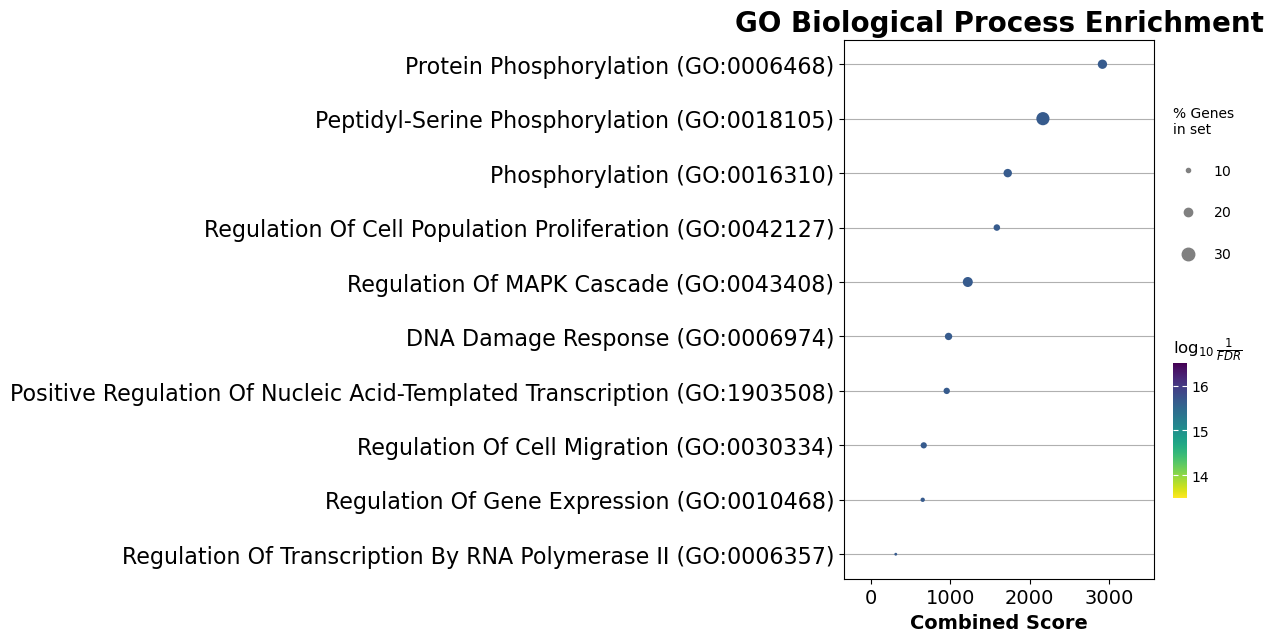

In [77]:
import gseapy as gp

# Beispiel mit deiner Genliste
gene_list = genes_with_10_hits.index.tolist()

# GO enrichment analysis
enr = gp.enrichr(gene_list=gene_list,
                 gene_sets='GO_Biological_Process_2023',
                 organism='Human',
                 outdir=None)

print(enr.results.head())

import matplotlib.pyplot as plt

# Dotplot für die Enrichment-Ergebnisse
gp.dotplot(enr.res2d, title='GO Biological Process Enrichment', figsize=(5, 7), cutoff=0.05)
plt.show()

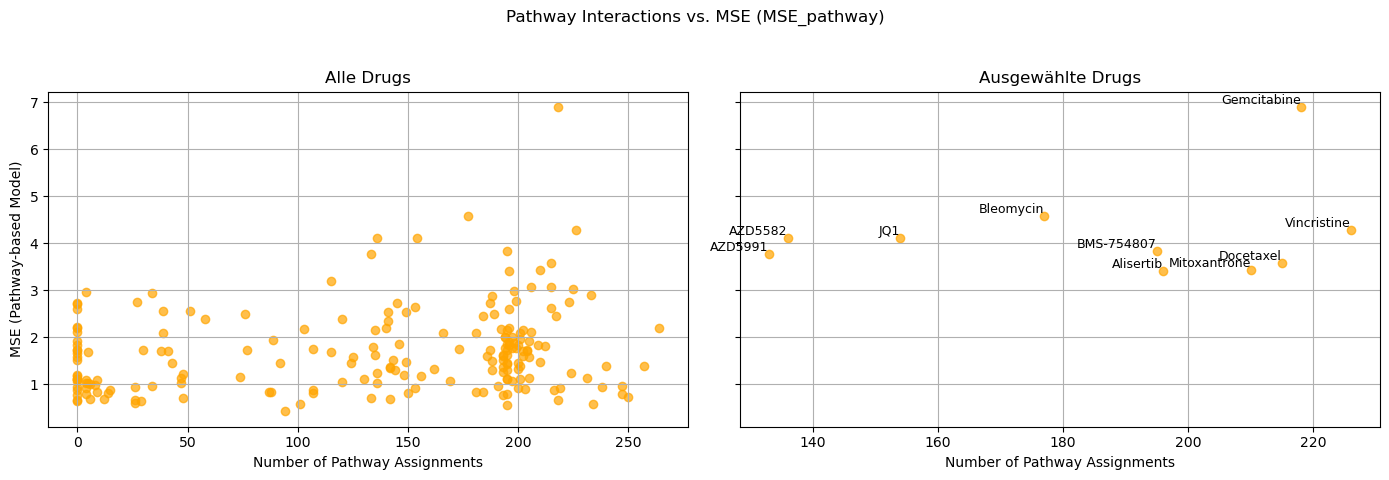

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot 1: Alle Daten
axes[0].scatter(df_mse["Pathway_interactions"], df_mse["MSE_pathway"], alpha=0.7, color="orange")
axes[0].set_title("Alle Drugs")
axes[0].set_xlabel("Number of Pathway Assignments")
axes[0].set_ylabel("MSE (Pathway-based Model)")
axes[0].grid(True)

# Plot 2: Nur ausgewählte Drugs, mit Beschriftung
axes[1].scatter(df_selected["Pathway_interactions"], df_selected["MSE_pathway"], alpha=0.7, color="orange")
for idx, row in df_selected.iterrows():
    axes[1].text(row['Pathway_interactions'], row['MSE_pathway'], str(idx),
                 fontsize=9, ha='right', va='bottom')
axes[1].set_title("Ausgewählte Drugs")
axes[1].set_xlabel("Number of Pathway Assignments")
axes[1].grid(True)

# Layout und Anzeige
plt.suptitle("Pathway Interactions vs. MSE (MSE_pathway)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [1]:
import pandas as pd
import numpy as np

dgi_matrix = pd.read_csv("./data/global_gene_interaction_matrix.csv", index_col=0).astype(np.float32)
pathway_matrix = pd.read_csv("./data/drug_pathway_binary_matrix.csv", index_col=0).astype(np.float32)

selected_drugs = {'Docetaxel', 'AZD5582', 'BMS-754807', 'AZD5991',
                  'Mitoxantrone', 'JQ1', 'Vincristine', 'Bleomycin',
                  'Gemcitabine', 'Alisertib'}

# Filter auf ausgewählte Drugs (Zeilen)
pathway_selected = pathway_matrix.loc[pathway_matrix.index.intersection(selected_drugs)]
dgi_selected = dgi_matrix.loc[dgi_matrix.index.intersection(selected_drugs)]

In [ ]:
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import seaborn as sns

gp = GProfiler(return_dataframe=True)
gene_list = dgi_selected.columns[(dgi_selected.sum(axis=0) == 10)].tolist()

# Enrichment Analyse gegen GO, KEGG etc.
results = gp.profile(organism='hsapiens', query=gene_list)
print(results.head())


  source      native                                     name        p_value  \
0  GO:BP  GO:0035556        intracellular signal transduction  1.779633e-184   
1  GO:BP  GO:0051716            cellular response to stimulus  2.846471e-157   
2  GO:BP  GO:0048522  positive regulation of cellular process  2.400813e-147   
3  GO:BP  GO:0016310                          phosphorylation  3.842253e-143   
4  GO:BP  GO:0048583       regulation of response to stimulus  4.691254e-142   

   significant                                        description  term_size  \
0         True  "The process in which a signal is passed on to...       2965   
1         True  "Any process that results in a change in state...       7376   
2         True  "Any process that activates or increases the f...       5920   
3         True  "The process of introducing a phosphate group ...       1320   
4         True  "Any process that modulates the frequency, rat...       3993   

   query_size  intersection_size  effe

/tmp/ipykernel_3289346/798502561.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


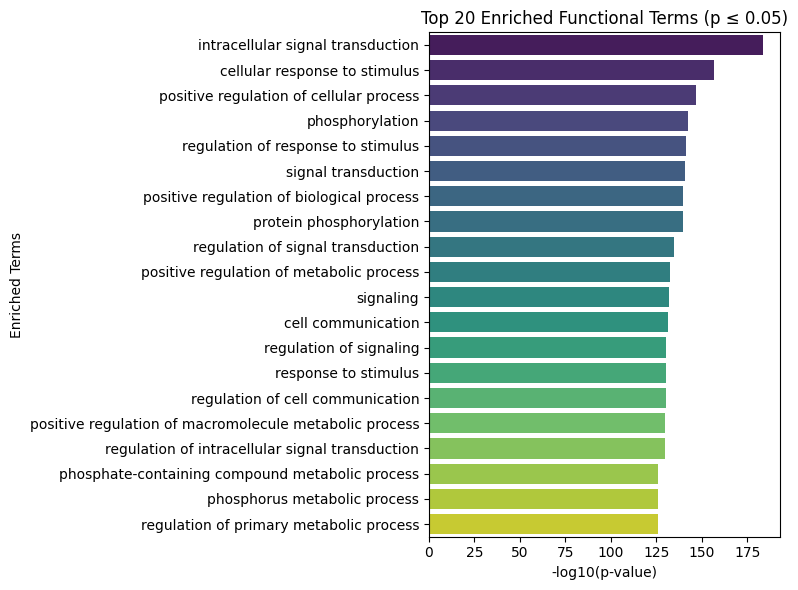

In [20]:
sig_results = results[results['p_value'] <= 0.05]

# Sortiere nach p-Wert (aufsteigend)
sig_results = sig_results.sort_values('p_value')

# Nimm z.B. die Top 20 Terms
top_terms = sig_results.head(20)

# Plot: Barplot mit -log10(p-value) für bessere Sichtbarkeit
plt.figure(figsize=(8,6))
sns.barplot(
    x=-np.log10(top_terms['p_value']),
    y=top_terms['name'],
    palette='viridis'
)
plt.xlabel('-log10(p-value)')
plt.ylabel('Enriched Terms')
plt.title('Top 20 Enriched Functional Terms (p ≤ 0.05)')
plt.tight_layout()
plt.show()


- Signaltransduktion , Proteinphosphorylierung  und Metabolismus von Phosphat-haltigen Verbindungen 

  source      native                    name        p_value  significant  \
0   KEGG  KEGG:05200      Pathways in cancer  3.472364e-123         True   
1   KEGG  KEGG:04010  MAPK signaling pathway  2.145856e-110         True   
2     WP   WP:WP5434         Cancer pathways  4.694560e-104         True   
3     WP    WP:WP382          MAPK signaling  4.929804e-100         True   
4     WP   WP:WP5087    Pleural mesothelioma   2.947606e-72         True   

              description  term_size  query_size  intersection_size  \
0      Pathways in cancer        527         434                192   
1  MAPK signaling pathway        301         434                145   
2         Cancer pathways        505         448                174   
3          MAPK signaling        245         448                127   
4    Pleural mesothelioma        435         448                136   

   effective_domain_size  precision    recall    query       parents  
0                   8484   0.442396  0.364326

/tmp/ipykernel_3289346/773630462.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='p_value', y='name', data=top_pathways, palette='viridis')


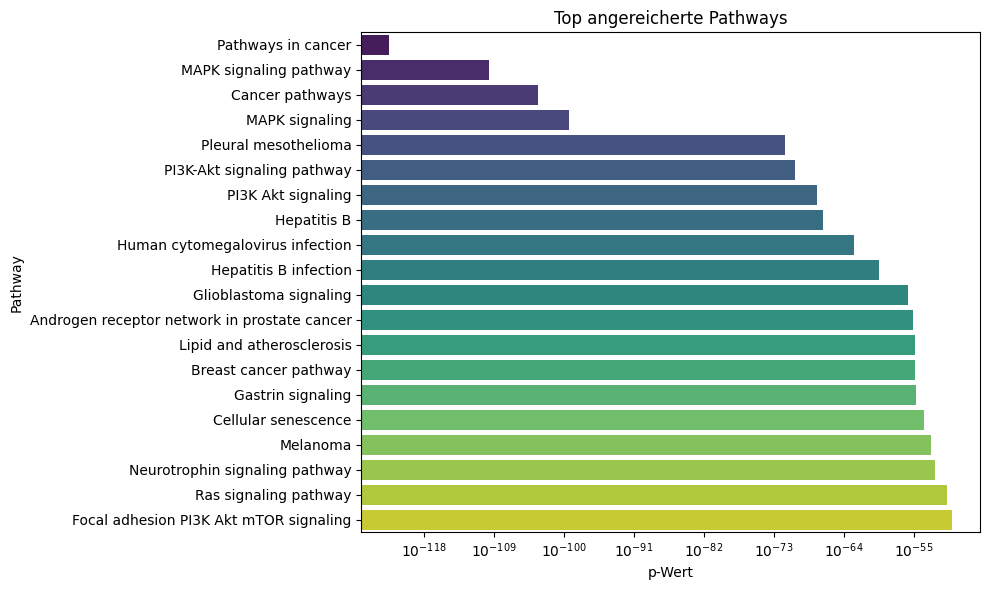

In [23]:
from gprofiler import GProfiler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisiere GProfiler
gp = GProfiler(return_dataframe=True)

# Deine Genliste (wie in deinem Code)
gene_list = dgi_selected.columns[(dgi_selected.sum(axis=0) == 10)].tolist()

# Führe Profiling mit ausgewählten Namespace/Quellen durch
results = gp.profile(
    organism='hsapiens',
    query=gene_list,
    sources=['KEGG', 'REACTOME', 'WP']  # WP = WikiPathways
)

print(results.head())

# Filtere nur signifikante Ergebnisse
significant_results = results[results['p_value'] < 0.05]

# Sortiere nach p-Wert
top_pathways = significant_results.sort_values('p_value').head(20)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='p_value', y='name', data=top_pathways, palette='viridis')
plt.title('Top angereicherte Pathways')
plt.xlabel('p-Wert')
plt.ylabel('Pathway')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [13]:
# Filter auf ausgewählte Drugs (Zeilen)
pathway_selected = pathway_matrix.loc[pathway_matrix.index.intersection(selected_drugs)]
dgi_selected = dgi_matrix.loc[dgi_matrix.index.intersection(selected_drugs)]

# Summiere über alle Spalten (Gene), sortiere nach Häufigkeit
gene_freq = dgi_selected.sum(axis=0).sort_values(ascending=False)

# Zeige die Top 10 am häufigsten getroffenen Gene
print(gene_freq.head(10))

# Summiere über alle Spalten (Pathways), sortiere nach Häufigkeit
pathway_freq = pathway_selected.sum(axis=0).sort_values(ascending=False)

# Zeige die Top 10 am häufigsten betroffenen Pathways
print(pathway_freq.head(10))

MAPK8     10.0
IDH2      10.0
SHC1      10.0
PPP3CC    10.0
PPP3CB    10.0
SHH       10.0
SIAH1     10.0
PPP3CA    10.0
IGF1      10.0
SKP1      10.0
dtype: float32
p53 signaling pathway                                  10.0
FoxO signaling pathway                                 10.0
Growth hormone synthesis, secretion and action         10.0
PI3K-Akt signaling pathway                             10.0
GnRH signaling pathway                                 10.0
Pancreatic cancer                                      10.0
Parathyroid hormone synthesis, secretion and action    10.0
Pathogenic Escherichia coli infection                  10.0
Pathways in cancer                                     10.0
Pathways of neurodegeneration                          10.0
dtype: float32


# Analysis DA-Approach

### Preprocess

In [277]:
import pandas as pd
import numpy as np

# 1. Lade gdsc_dataset (enthält alle relevanten Zelllinien und Drugs)
gdsc_dataset = pd.read_csv('./data/GDSCDA_fpkm_AUC_all_drugs.zip', index_col=0)
drug_list = list(gdsc_dataset.columns[1780:])
gene_list = list(gdsc_dataset.columns[:1780])
cell_lines = gdsc_dataset.index

# 2. Lade und kombiniere Rohdaten
raw_data_GDSC2 = pd.read_excel("/Users/tm03/Downloads/GDSC2_fitted_dose_response_27Oct23.xlsx") 
raw_data_GDSC1 = pd.read_excel("/Users/tm03/Downloads/GDSC1_fitted_dose_response_27Oct23.xlsx") 
raw_data = pd.concat([raw_data_GDSC1, raw_data_GDSC2], ignore_index=True)

# 3. Filtere nur relevante Daten
filtered_data = raw_data[
    raw_data['DRUG_NAME'].isin(drug_list) &
    raw_data['CELL_LINE_NAME'].isin(cell_lines)
]

# 4. Erzeuge AUC-Matrix
auc_matrix = filtered_data.pivot_table(
    index='CELL_LINE_NAME',
    columns='DRUG_NAME',
    values='AUC'
)

# 5. Reindexiere Zeilen und Spalten gemäß gdsc_dataset
auc_matrix = auc_matrix.reindex(index=cell_lines, columns=drug_list)
auc_matrix = auc_matrix.drop(columns=["Carmustine", "Vincristine"])

In [304]:
rna_seq = pd.read_csv("/Users/tm03/Downloads/rnaseq.txt", sep='\t')
cell_lines_details = pd.read_excel("/Users/tm03/Downloads/Cell_Lines_Details.xlsx")
rna_seq = rna_seq[rna_seq["GENE_SYMBOLS"].isin(gene_list)]

/Users/tm03/.pyenv/versions/3.12.3/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [305]:
cosmier = list(rna_seq.columns[2:])
cosmier_clean = [col.replace("DATA.", "") for col in cosmier]

In [306]:
# Schritt 1: COSMIC ID bereinigen (entferne .0 und wandele in String um)
cell_lines_details['COSMIC identifier'] = (
    cell_lines_details['COSMIC identifier']
    .fillna(0)               # Leere Werte füllen
    .astype(float)
    .astype(int)
    .astype(str)
)

# Schritt 2: Mapping erstellen wie vorher
cosmic_to_sample = dict(zip(
    cell_lines_details['COSMIC identifier'],
    cell_lines_details['Sample Name']
))

# Schritt 3: Liste der Sample Names bauen
sample_names = [cosmic_to_sample.get(cosmic_id, "Unknown") for cosmic_id in cosmier_clean]
# Fertig!
print(sample_names)

['CAL-120', 'DMS-114', 'CAL-51', 'H2869', 'H290', 'A2058', 'CESS', 'H2803', 'H2722', 'HCC1419', 'ETK-1', 'C32', 'SW1783', 'H2810', 'DSH1', 'HT-1197', 'MDA-MB-157', 'H2373', 'ES1', 'HDLM-2', 'H2731', 'IST-MEL1', 5637, '786-0', 'HeLa', 'HMV-II', 'H2818', 'M14', 'HT-29', 'AU565', 'NCI-H441', 'SW1088', 'IST-MES1', 'HCT-116', 'GA-10', 'KYSE-450', 'NCI-H2052', 'LOXIMVI', 'HOS', 'NCI-H28', 'NCI-H358', 'Becker', 'RS4-11', 'NCI-H727', 'NCI-H1299', 'COLO-800', 'BT-474', 'Saos-2', 'NCI-H838', 'NCI-H2228', 'LS-411N', 'RKO', 'RPMI-7951', 'CAL-54', 'WM-115', 'NCI-H2009', 'ES3', 'Unknown', 'D-283MED', '639-V', 'OE19', 'NCI-H2452', 'EFM-192A', 'UACC-62', 'DU-4475', 'SISO', 'JHH-1', 'COLO-680N', 'ESO51', 'CAL-33', 'CAL-29', 'UACC-257', 'PA-1', 'H2591', 'H513', 'H2461', 'KELLY', 'NCI-H661', 'ES8', 'H2795', 'SW1417', 'H2369', '647-V', 'TGBC24TKB', 'H2595', 'MPP-89', 'IGR-1', 'NCI-H2030', 'SK-MEL-1', 'COLO-205', 'BFTC-905', 'H2804', 'REH', 'RH-41', 'RPMI-8866', 'PANC-08-13', 'PCI-6A', 'NCI-H1792', 'NCI-H1

In [307]:
rna_seq = rna_seq.drop(columns=["GENE_title"])
rna_seq = rna_seq.set_index("GENE_SYMBOLS")
rna_seq.columns = sample_names



In [308]:
# 1. Finde gemeinsame Zelllinien
common_cl = rna_seq.columns.intersection(cell_lines)

# 2. Erzeuge eine neue Spaltenliste in der Reihenfolge von cell_lines
ordered_columns = [cl for cl in cell_lines]

# 3. Neues DataFrame mit allen Zelllinien aus cell_lines, gefüllt mit NaNs
rna_seq_full = pd.DataFrame(columns=ordered_columns, index=rna_seq.index)

# 4. Kopiere vorhandene Daten aus rna_seq in das neue DataFrame
for cl in common_cl:
    rna_seq_full[cl] = rna_seq[cl]

In [309]:
# 1. Finde gemeinsame Gene zwischen rna_seq und gene_list
common_genes = rna_seq.index.intersection(gene_list)

# 2. Sortiere Gene nach Originalreihenfolge von gene_list
ordered_genes = [g for g in gene_list if g in common_genes]

# 3. Filtere und ordne das RNA-seq DataFrame nach diesen Genen
rna_seq_final = rna_seq_full.loc[ordered_genes, :]


In [310]:
# Anzahl Zeilen
num_rows = rna_seq_final.shape[0]

# Anzahl NaNs pro Spalte
nan_counts_cols = rna_seq_final.isna().sum()

# Spalten löschen, bei denen alle Werte NaN sind
rna_seq_final = rna_seq_final.loc[:, nan_counts_cols < num_rows]



In [311]:
rna_seq_final = rna_seq_final.T

In [312]:
# Anzahl Zeilen
num_rows = auc_matrix.shape[0]

# Anzahl NaNs pro Spalte
nan_counts_cols = auc_matrix.isna().sum()

# Spalten löschen, bei denen alle Werte NaN sind
auc_matrix = auc_matrix.loc[:, nan_counts_cols < num_rows]

In [313]:
final = pd.concat([rna_seq_final, auc_matrix], axis=1)

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [256]:
final

,AATK,ABCA1,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,BMS-754807,JQ1,Cetuximab,Doxorubicin,Etoposide,Bleomycin,Bicalutamide,Bleomycin (50 uM),Pemetrexed,AICA Ribonucleotide
22RV1,4.558683,3.384710,5.202073,4.755573,6.779068,3.989970,4.579564,3.382649,4.276508,4.751220,...,0.797073,0.824926,0.976193,0.419583,0.536727,0.773415,0.976039,0.856327,0.895641,0.906342
23132-87,5.491081,3.505168,4.862309,4.920243,6.397471,4.886817,4.185426,2.975946,4.881965,4.049837,...,0.966305,0.943718,0.980224,0.263224,0.422296,0.568055,0.983515,0.576002,0.834348,0.940376
42-MG-BA,3.767146,3.960124,6.004163,5.181071,6.824535,6.819983,3.686583,3.516985,5.680277,4.650665,...,0.874791,0.895969,0.979127,0.477863,0.838259,0.759446,0.982012,0.386132,0.966053,0.868934
5637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.721385,0.840238,0.958760,0.327280,0.465411,0.472947,0.986678,0.407364,0.857540,0.926636
639-V,3.640208,3.427534,5.339855,4.617904,7.486542,4.904496,4.323197,2.923323,4.601588,5.119100,...,0.846412,0.781949,0.968080,0.271610,0.531856,0.533927,0.987853,0.444581,0.980025,0.884335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,3.914292,6.034562,5.524131,4.265361,6.938645,5.162040,4.166928,3.786841,4.568966,4.614720,...,0.841276,0.947779,0.979276,0.748460,0.904094,0.968732,0.970940,0.748675,0.873897,0.948306
YH-13,3.426307,4.757310,6.305437,5.538423,6.810783,5.542358,3.673369,4.178920,4.048168,3.957487,...,0.885362,0.874783,0.000000,0.667247,0.966867,0.918609,0.983237,0.556366,0.989034,0.961775
YT,3.579154,3.633691,4.328778,4.437148,7.547734,5.376869,3.648401,3.235691,3.401517,3.817772,...,0.955470,0.686821,0.989298,0.784210,0.848521,0.341884,0.986403,0.779956,0.967707,0.930035
ZR-75-30,3.701709,3.637436,4.840972,5.551901,6.536802,4.628731,4.563449,3.047012,4.025556,4.861405,...,0.790522,0.843634,0.000000,0.590226,0.596839,0.803242,0.971717,0.961986,0.977251,0.874786


In [257]:
final.to_csv("final_new_GDSC.csv")


In [271]:
# Step 3: Normalized

import numpy as np

# 1. load result file of tmm normalization done in r-script
rnaseg_UMG_tmm = pd.read_csv("./TMM_log_new_GDSC_normalized_rnaseq.csv", index_col=0) # was created with r-script

# 2. load rnaseq file for row and colnames
rnaseg_UMG= pd.read_csv("./final_new_GDSC.csv")

# code by Mourragui adapted for my case

# 3.log transform data
average_depth_global = 10**5 # is given in script of Mourragui
GE_normalized = rnaseg_UMG_tmm.values.astype(float)
GE_normalized = np.array(GE_normalized)
average_depths = np.mean(np.sum(GE_normalized, 1))
GE_normalized = GE_normalized / average_depths * average_depth_global
GE_normalized = np.log(np.array(GE_normalized) + 1)
rnaseg_UMG_normalized = pd.DataFrame (GE_normalized, index=rnaseg_UMG.index, columns=rnaseg_UMG.columns)

# Mean-Centering und Standardisierung für jede Gen-Spalte
standardized_df = (rnaseg_UMG_normalized - rnaseg_UMG_normalized.mean(axis=0)) / rnaseg_UMG_normalized.std(axis=0)
standardized_df = standardized_df.drop(columns=["Unnamed: 0"])
standardized_df = standardized_df.set_index(cell_lines)

In [273]:
standardized_df

,AATK,ABCA1,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,BMS-754807,JQ1,Cetuximab,Doxorubicin,Etoposide,Bleomycin,Bicalutamide,Bleomycin (50 uM),Pemetrexed,AICA Ribonucleotide
22RV1,0.329021,0.014691,0.164495,0.179493,0.211096,0.089029,0.311309,0.135859,0.137807,0.255930,...,0.262624,0.146788,0.352345,-1.072835,0.668794,0.341116,0.142315,0.434551,0.363378,0.228523
23132-87,0.431287,0.198223,0.164495,0.179493,0.132980,0.219168,0.178436,0.135859,0.268973,0.124706,...,0.262624,0.146788,0.352345,-1.072835,-1.493371,0.341116,0.142315,0.434551,0.363378,0.228523
42-MG-BA,0.196264,0.198223,0.263909,0.179493,0.211096,0.400132,0.178436,0.324809,0.370014,0.255930,...,0.262624,0.146788,0.352345,-1.072835,0.668794,0.341116,0.142315,-2.298367,0.363378,0.228523
5637,-4.800904,-4.781296,-4.822348,-4.820416,-4.831070,-4.809647,-4.823139,-4.801698,-4.799501,-4.814782,...,0.262624,0.146788,0.352345,-1.072835,-1.493371,-2.927912,0.142315,-2.298367,0.363378,0.228523
639-V,0.196264,0.014691,0.164495,0.179493,0.276002,0.219168,0.178436,0.135859,0.268973,0.255930,...,0.262624,0.146788,0.352345,-1.072835,0.668794,0.341116,0.142315,-2.298367,0.363378,0.228523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAPC,0.196264,0.432416,0.164495,0.050102,0.211096,0.219168,0.178436,0.324809,0.268973,0.255930,...,0.262624,0.146788,0.352345,0.930952,0.668794,0.341116,0.142315,0.434551,0.363378,0.228523
YH-13,0.012082,0.330511,0.263909,0.279168,0.211096,0.319419,0.178436,0.324809,0.137807,0.124706,...,0.262624,0.146788,-2.834599,0.930952,0.668794,0.341116,0.142315,0.434551,0.363378,0.228523
YT,0.196264,0.198223,0.035442,0.050102,0.211096,0.219168,0.178436,0.135859,-0.044169,0.124706,...,0.262624,0.146788,0.352345,0.930952,0.668794,-2.927912,0.142315,0.434551,0.363378,0.228523
ZR-75-30,0.196264,0.198223,0.164495,0.279168,0.211096,0.219168,0.311309,0.135859,0.137807,0.255930,...,0.262624,0.146788,-2.834599,0.930952,0.668794,0.341116,0.142315,0.434551,0.363378,0.228523


In [62]:
# cell-line dataset;
gdsc_dataset = pd.read_csv('./data/GDSCDA_fpkm_AUC_all_drugs.zip', index_col=0)
# gene set range (first 1780 columns represent genes, from the 1781st column to the end represent data on drugs)
gene_list = gdsc_dataset.columns[0:1780]
drug_list = gdsc_dataset.columns[1780:]

# pdx novartis dataset;
pdx_dataset = pd.read_csv('./data/PDX_MTL_DA.csv', index_col=0)
drugs_pdx = pdx_dataset.columns[1780:]

In [64]:
pdx_dataset

,AATK,ABCA1,ABL1,ABL2,ACTR2,ACVR1,ACVR1B,ACVR1C,ACVR2A,ACVR2B,...,Gemcitabine,Afatinib,Paclitaxel,5-Fluorouracil,Trametinib,Buparlisib,Ruxolitinib,Tamoxifen,Alpelisib,LGK974
index,,,,,,,,,,,,,,,,,,,,,
X-1004,-0.929242,-0.070977,-0.609101,0.276754,1.182954,-0.540477,-0.257917,-0.587829,-1.743032,1.281391,...,NaN,-11.600,-17.500000,NaN,NaN,23.700,-2.050,48.166667,9.300000,NaN
X-1008,-0.929242,-0.070977,0.332833,-0.323399,1.219991,-1.267598,-0.825040,-0.587829,-0.174073,0.349245,...,NaN,44.175,-44.762500,NaN,NaN,10.540,6.125,35.960000,-30.679167,NaN
X-1027,1.442502,-0.070977,-0.485630,-1.466066,-1.078778,-1.267598,-2.265982,-0.587829,0.284847,-0.473558,...,NaN,NaN,NaN,184.220000,NaN,66.020,NaN,NaN,15.025000,NaN
X-1095,-0.133912,-0.070977,-0.069624,-0.773627,-0.520218,-0.540477,1.525204,-0.587829,-0.792267,0.884236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-1119,2.029952,-0.070977,-0.485630,-1.466066,-0.090939,-0.749219,0.026965,-0.587829,1.640206,-0.473558,...,NaN,NaN,NaN,-28.811538,NaN,10.600,NaN,NaN,48.050000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-5959,1.116086,-0.070977,-0.485630,2.344632,-0.556372,-0.037175,-0.423945,1.199564,-0.174073,1.281391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-5974,-0.929242,-0.070977,-0.889024,-0.323399,0.329726,-0.749219,-0.108638,-0.587829,-0.174073,1.597378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-5975,-0.133912,-0.070977,0.019397,0.276754,0.865983,-0.037175,-0.108638,1.199564,-0.174073,0.349245,...,NaN,NaN,-50.945833,NaN,NaN,22.475,8.380,29.180000,3.550000,NaN


### Result

In [90]:
# Load each DataFrame with baseline and naive approach
preds_AUC_gene = pd.read_csv('./results/DA/preds_AUC_naiv_gene_level.csv', index_col=0)
preds_AUC_baseline = pd.read_csv('./results/DA/preds_AUC.csv', index_col=0)
preds_AUC_pathway = pd.read_csv('./results/DA/preds_AUC_naiv_pathway_level.csv', index_col=0)

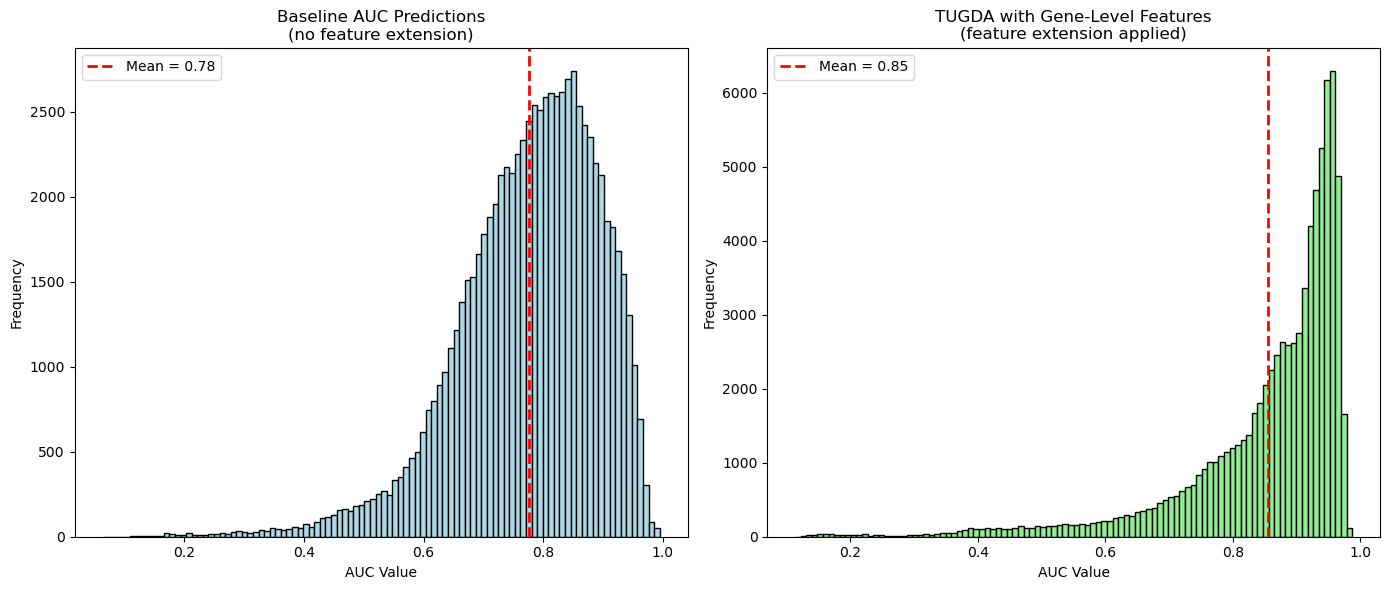

In [3]:
# drug sensitivity score AUC
# Je kleiner der AUC-Wert, desto empfindlicher ist das Modell gegenüber dem Medikament (weil weniger Dosis nötig ist, um Effekt zu erzielen)
# Ein hoher AUC-Wert bedeutet Resistenz bzw. geringere Wirkung des Medikaments.

import matplotlib.pyplot as plt
import numpy as np

# Wandle in 1D Arrays um
gene_values = preds_AUC_gene.values.flatten()
baseline_values = preds_AUC_baseline.values.flatten()

# Plot mit zwei Subplots (nebeneinander)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linkes Histogramm - Baseline
axes[0].hist(baseline_values, bins=100, color='lightblue', edgecolor='black')
axes[0].axvline(x=np.mean(baseline_values), color='red', linestyle='--', linewidth=2,
                label=f'Mean = {np.mean(baseline_values):.2f}')
axes[0].set_xlabel('AUC Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Baseline AUC Predictions\n(no feature extension)')
axes[0].legend()

# Rechtes Histogramm - Gene-Level Extension
axes[1].hist(gene_values, bins=100, color='lightgreen', edgecolor='black')
axes[1].axvline(x=np.mean(gene_values), color='red', linestyle='--', linewidth=2,
                label=f'Mean = {np.mean(gene_values):.2f}')
axes[1].set_xlabel('AUC Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('TUGDA with Gene-Level Features\n(feature extension applied)')
axes[1].legend()

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()


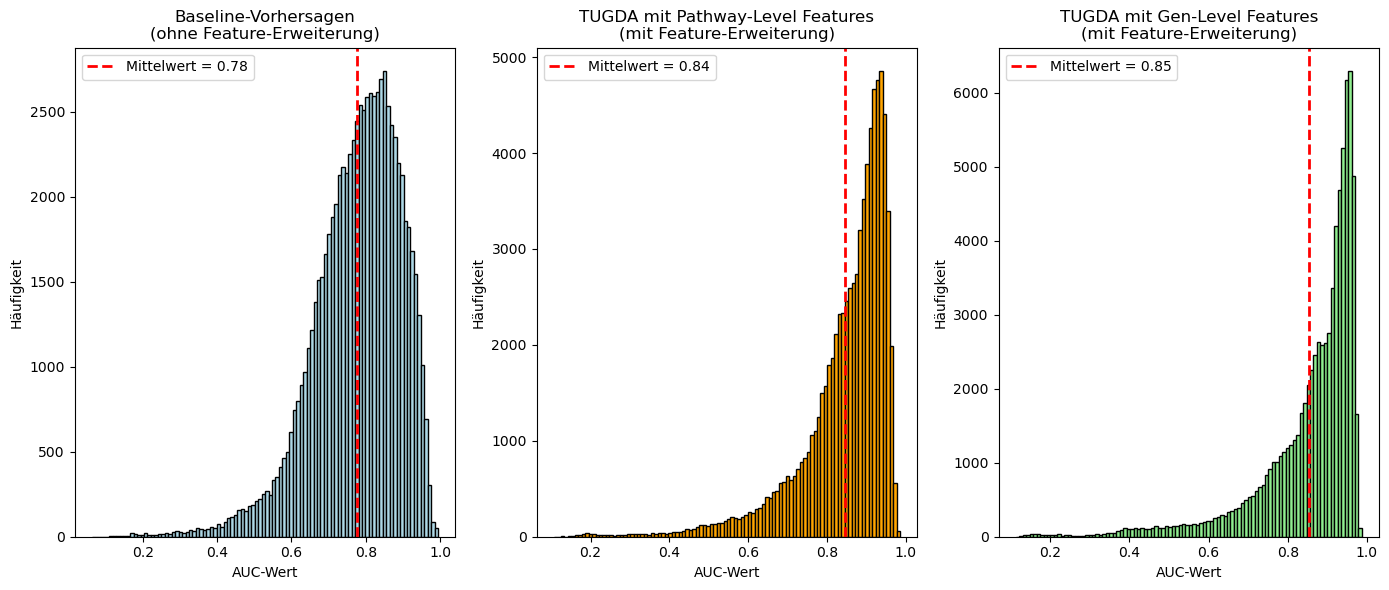

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Wandle in 1D Arrays um
gene_values = preds_AUC_gene.values.flatten()
baseline_values = preds_AUC_baseline.values.flatten()
pathway_values = preds_AUC_pathway.values.flatten()

# Plot mit zwei Subplots (nebeneinander)
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Linkes Histogramm - Baseline
axes[0].hist(baseline_values, bins=100, color='lightblue', edgecolor='black')
axes[0].axvline(x=np.mean(baseline_values), color='red', linestyle='--', linewidth=2,
                label=f'Mittelwert = {np.mean(baseline_values):.2f}')
axes[0].set_xlabel('AUC-Wert')
axes[0].set_ylabel('Häufigkeit')
axes[0].set_title('Baseline-Vorhersagen\n(ohne Feature-Erweiterung)')
axes[0].legend()

# Mittleres Histogramm - Pathway-Level Extension
axes[1].hist(pathway_values, bins=100, color='orange', edgecolor='black')
axes[1].axvline(x=np.mean(pathway_values), color='red', linestyle='--', linewidth=2,
                label=f'Mittelwert = {np.mean(pathway_values):.2f}')
axes[1].set_xlabel('AUC-Wert')
axes[1].set_ylabel('Häufigkeit')
axes[1].set_title('TUGDA mit Pathway-Level Features\n(mit Feature-Erweiterung)')
axes[1].legend()

# Rechtes Histogramm - Gene-Level Extension
axes[2].hist(gene_values, bins=100, color='lightgreen', edgecolor='black')
axes[2].axvline(x=np.mean(gene_values), color='red', linestyle='--', linewidth=2,
                label=f'Mittelwert = {np.mean(gene_values):.2f}')
axes[2].set_xlabel('AUC-Wert')
axes[2].set_ylabel('Häufigkeit')
axes[2].set_title('TUGDA mit Gen-Level Features\n(mit Feature-Erweiterung)')
axes[2].legend()

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()

Korrelation
- df_expression = 399 Zeilen mit 1764 Genen
- df_response = 399 Zeilen mit 200 Drugs
 
⚠️ Wichtige Einschränkungen: 

Trotzdem gibt es Dinge, die du beachten solltest: 
Nur lineare Zusammenhänge
	
Korrelation erfasst nur lineare Beziehungen. Nicht-lineare Effekte bleiben unentdeckt.
Keine Wechselwirkungen zwischen Genen
	
Es wird immer nur ein Gen isoliert betrachtet – aber in der Realität wirken Gene oft zusammen.
Batch-Effekte / Heterogenität der PDX-Proben
	
Die Proben kommen von unterschiedlichen Quellen, Gewebetypen etc. Das kann die Ergebnisse beeinflussen.
Multiple Testing Problem
	
Bei Tausenden von Genen und mehreren Medikamenten: viele Korrelationen werden zufällig signifikant → Benutze FDR-Korrektur!

In [97]:
# mean preds_AUC_baseline pro Drug

means_baseline = preds_AUC_baseline.mean()
means_gene = preds_AUC_gene.mean()
means_pathway = preds_AUC_pathway.mean()

gdsc_dataset = pd.read_csv('./data/GDSCDA_fpkm_AUC_all_drugs.zip', index_col=0)
gdsc_drugs = gdsc_dataset.iloc[:, -200:]
means_drugs = gdsc_drugs.mean() # NaN values are automatically skipped




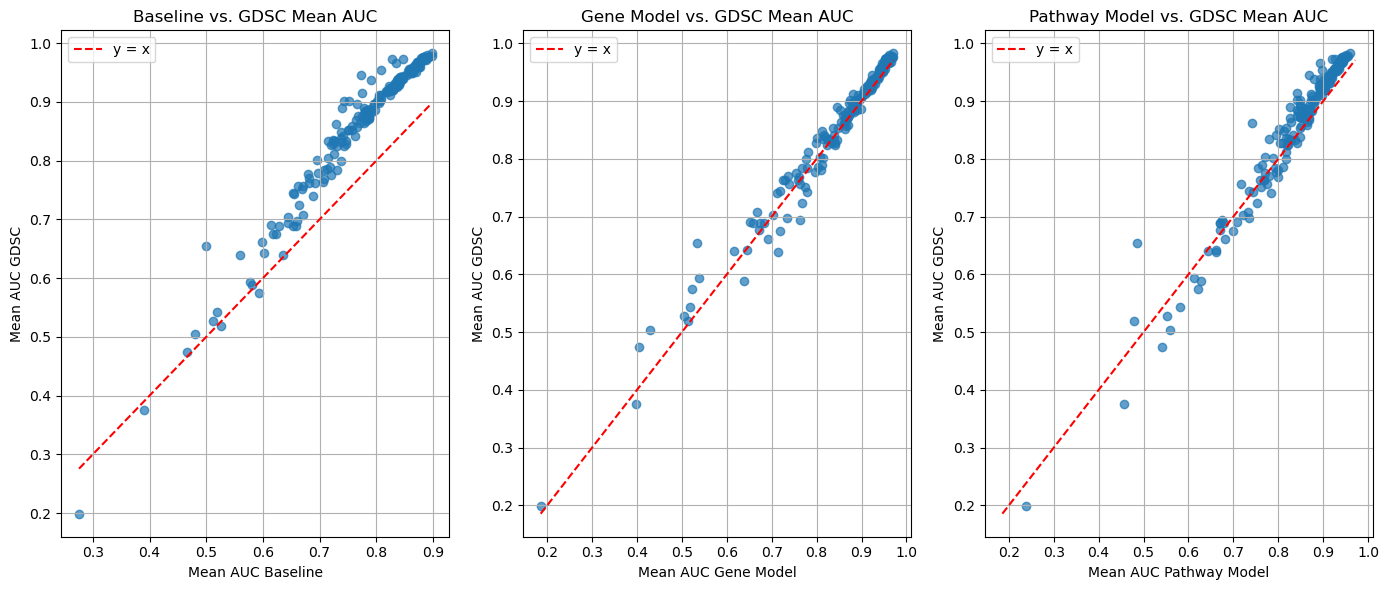

In [98]:
import matplotlib.pyplot as plt

# Gemeinsame Drogen finden (Index-Schnittmenge)
common_drugs_baseline = means_baseline.index.intersection(means_drugs.index)
common_drugs_gene = means_gene.index.intersection(means_drugs.index)
common_drugs_pathways = means_pathway.index.intersection(means_drugs.index)


# Werte extrahieren
x1 = means_baseline[common_drugs_baseline]
y1 = means_drugs[common_drugs_baseline]

x2 = means_gene[common_drugs_gene]
y2 = means_drugs[common_drugs_gene]

x3 = means_pathway[common_drugs_pathways]
y3 = means_drugs[common_drugs_pathways]



# Plot
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Plot 1: Baseline vs GDSC
axes[0].scatter(x1, y1, alpha=0.7)
axes[0].plot([x1.min(), x1.max()], [x1.min(), x1.max()], 'r--', label='y = x')
axes[0].set_title('Baseline vs. GDSC Mean AUC')
axes[0].set_xlabel('Mean AUC Baseline')
axes[0].set_ylabel('Mean AUC GDSC')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Gene vs GDSC
axes[1].scatter(x2, y2, alpha=0.7)
axes[1].plot([x2.min(), x2.max()], [x2.min(), x2.max()], 'r--', label='y = x')
axes[1].set_title('Gene Model vs. GDSC Mean AUC')
axes[1].set_xlabel('Mean AUC Gene Model')
axes[1].set_ylabel('Mean AUC GDSC')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Gene vs GDSC
axes[2].scatter(x3, y3, alpha=0.7)
axes[2].plot([x2.min(), x2.max()], [x2.min(), x2.max()], 'r--', label='y = x')
axes[2].set_title('Pathway Model vs. GDSC Mean AUC')
axes[2].set_xlabel('Mean AUC Pathway Model')
axes[2].set_ylabel('Mean AUC GDSC')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()



In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

# Nur gemeinsame Drogen verwenden
common = means_gene.index.intersection(means_drugs.index)
true_vals = means_drugs[common]
pred_gene = means_gene[common]
pred_base = means_baseline[common]

# MAE
mae_gene = mean_absolute_error(true_vals, pred_gene)
mae_base = mean_absolute_error(true_vals, pred_base)

# R²
r2_gene = r2_score(true_vals, pred_gene)
r2_base = r2_score(true_vals, pred_base)

print(f"Gene Model: MAE = {mae_gene:.3f}, R² = {r2_gene:.3f}")
print(f"Baseline Model: MAE = {mae_base:.3f}, R² = {r2_base:.3f}")



Gene Model: MAE = 0.015, R² = 0.969
Baseline Model: MAE = 0.089, R² = 0.442


Baseline Model:

- Im Durchschnitt zeigt das Modell eine Abweichung von 0.089 zum tatsächlichen AUC Wert
- 44,2% der Varianz wird erklärt 

Gene Model:

- Im Durchschnitt zeigt das Modell eine Abweichung von 0.015 zum tatsächlichen AUC Wert
- 99,6% der Varianz wird erklärt 

Je größer der Prozentsatz, der durch das Regressionsmodell erklärt wird, desto näher liegen die Datenpunkte an der angepassten Regressionslinie. Wenn ein Modell theoretisch 100 % der Streuung erklären könnte, wären die angepassten Werte immer gleich den beobachteten Werten, und daher würden alle Datenpunkte auf der angepassten Regressionslinie liegen.

In [99]:
# Schritt 2: Gemeinsamen DataFrame erstellen
df_means = pd.concat([means_baseline, means_gene, means_pathway, means_drugs], axis=1)
df_means.columns = ['baseline', 'gene','pathway', 'gdsc']

# Schritt 3: Zeilen mit NaNs entfernen (falls nötig)
df_means = df_means.dropna()

# Schritt 4: Korrelation berechnen
correlation_matrix = df_means.corr()
print(correlation_matrix)

          baseline      gene   pathway      gdsc
baseline  1.000000  0.971523  0.979900  0.980654
gene      0.971523  1.000000  0.974949  0.987511
pathway   0.979900  0.974949  1.000000  0.979742
gdsc      0.980654  0.987511  0.979742  1.000000


Ein Medikament mit höherer vorhergesagter AUC hat (also geringere Empfindlichkeit / weniger Wirkung), dann zeigt auch die Realität (GDSC-Daten) tendenziell eine höhere AUC für dieses Drug.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# --- Lade Daten ---
preds_AUC_gene = pd.read_csv('./results/DA/preds_AUC_naiv_gene_level.csv', index_col=0)
preds_AUC_baseline = pd.read_csv('./results/DA/preds_AUC.csv', index_col=0)
preds_AUC_pathway = pd.read_csv('./results/DA/preds_AUC_naiv_pathway_level.csv', index_col=0)

pdx_dataset = pd.read_csv('./data/PDX_MTL_DA.csv', index_col=0)
drugs_pdx = pdx_dataset.iloc[:, -12:]

# --- Gemeinsame Indizes finden ---
common_index = (
    preds_AUC_baseline.index
    .intersection(preds_AUC_gene.index)
    .intersection(preds_AUC_pathway.index)
    .intersection(drugs_pdx.index)
)

# --- Daten auf gemeinsame Indizes beschränken ---
preds_AUC_baseline = preds_AUC_baseline.loc[common_index]
preds_AUC_gene = preds_AUC_gene.loc[common_index]
preds_AUC_pathway = preds_AUC_pathway.loc[common_index]
drugs_pdx = drugs_pdx.loc[common_index]

# --- Ergebnisse sammeln ---
results = {
    'baseline': {},
    'naive_gene': {},
    'naive_pathway': {}
}

# --- Für jedes Medikament Korrelation berechnen ---
for drug in drugs_pdx.columns:
    y_true = drugs_pdx[drug]
    valid_idx = ~y_true.isna()
    
    if sum(valid_idx) < 2:
        results['baseline'][drug] = float('nan')
        results['naive_gene'][drug] = float('nan')
        results['naive_pathway'][drug] = float('nan')
        continue

    y_true_valid = y_true[valid_idx]
    
    # Baseline
    y_pred_baseline_valid = preds_AUC_baseline.loc[valid_idx, drug]
    if y_pred_baseline_valid.nunique() == 1:
        results['baseline'][drug] = float('nan')
    else:
        corr_baseline, _ = spearmanr(y_true_valid, y_pred_baseline_valid)
        results['baseline'][drug] = corr_baseline

    # Naive Gene-Level
    y_pred_naive_gene_valid = preds_AUC_gene.loc[valid_idx, drug]
    if y_pred_naive_gene_valid.nunique() == 1:
        results['naive_gene'][drug] = float('nan')
    else:
        corr_naive_gene, _ = spearmanr(y_true_valid, y_pred_naive_gene_valid)
        results['naive_gene'][drug] = corr_naive_gene

    # Naive Pathway-Level
    y_pred_naive_pathway_valid = preds_AUC_pathway.loc[valid_idx, drug]
    if y_pred_naive_pathway_valid.nunique() == 1:
        results['naive_pathway'][drug] = float('nan')
    else:
        corr_naive_pathway, _ = spearmanr(y_true_valid, y_pred_naive_pathway_valid)
        results['naive_pathway'][drug] = corr_naive_pathway

# --- In DataFrame konvertieren ---
results_df = pd.DataFrame(results)

# Optional: Ergebnisse speichern
# results_df.to_csv('./results/DA/correlation_results.csv')


                baseline  naive_gene  naive_pathway
Erlotinib       0.639231    0.156154       0.603846
Cetuximab       0.400756    0.233548       0.379067
Gemcitabine     0.029412    0.256022       0.414846
Afatinib        0.396159    0.298483       0.474870
Paclitaxel      0.253758   -0.161391       0.323160
5-Fluorouracil  0.205052    0.236237       0.152439
Trametinib     -0.002371   -0.195590       0.089616
Buparlisib      0.205649    0.020111       0.040593
Ruxolitinib    -0.137492   -0.088263      -0.159993
Tamoxifen       0.146296   -0.137105       0.201007
Alpelisib       0.323570    0.163646       0.267206
LGK974          0.132992   -0.009719       0.162294


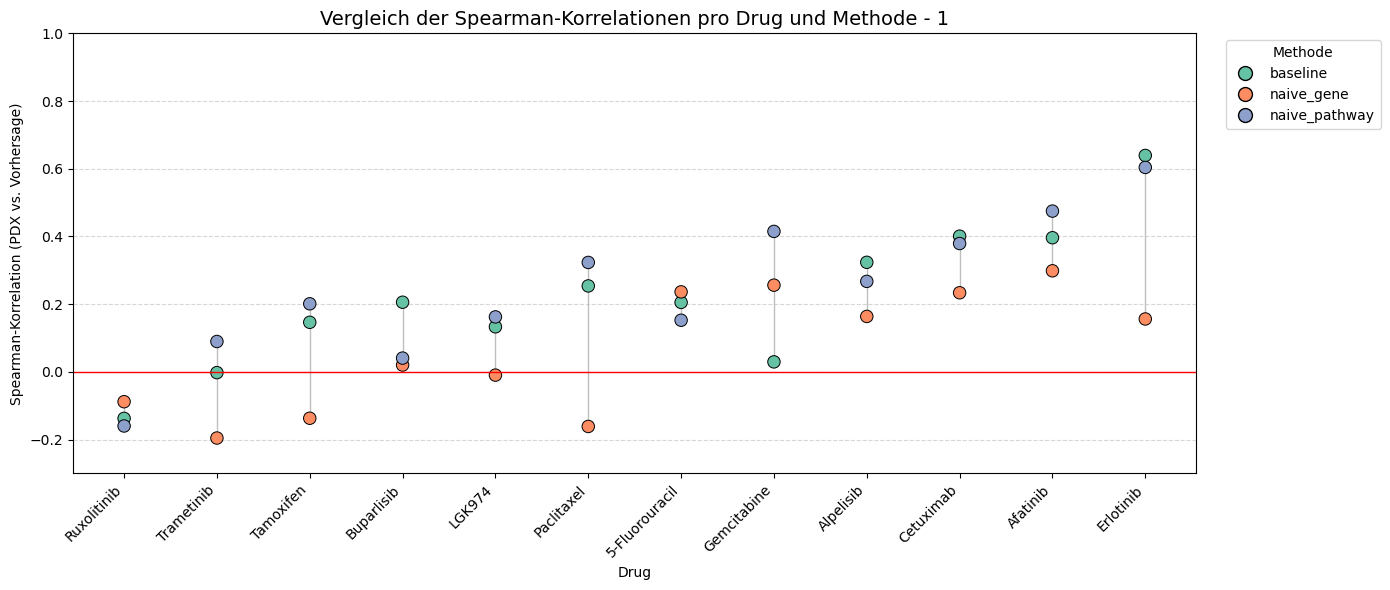

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Daten vorbereiten ---
results_melted = results_df.reset_index().melt(id_vars='index', 
                                                var_name='Methode', 
                                                value_name='Spearman-Korrelation')
results_melted.rename(columns={'index': 'Drug'}, inplace=True)

# --- Sortierung nach Mittelwert (optional für bessere Lesbarkeit) ---
drug_order = results_df.mean(axis=1).sort_values().index.tolist()
method_order = ['baseline', 'naive_gene', 'naive_pathway']

# --- Plot erstellen ---
plt.figure(figsize=(14, 6))

# Punkte + vertikale Verbindungslinien je Drug
for drug in drug_order:
    subset = results_melted[results_melted['Drug'] == drug]
    x_pos = [drug] * len(subset)
    y_vals = subset['Spearman-Korrelation'].values
    methods = subset['Methode'].values
    
    # Vertikale Linie von min bis max
    if len(y_vals) > 1:
        plt.plot([drug, drug], [np.min(y_vals), np.max(y_vals)],
                 color='gray', linewidth=1, alpha=0.5, zorder=1)

    # Punkte (farbig nach Methode)
    sns.scatterplot(x=x_pos,
                    y=y_vals,
                    hue=methods,
                    palette='Set2',
                    s=80,
                    edgecolor='black',
                    legend=False,
                    zorder=2)

# --- Hintergrundlinie bei 0 ---
plt.axhline(0, color='red', linestyle='-', linewidth=1)

# --- Plot-Einstellungen ---
plt.xticks(rotation=45, ha='right')
plt.ylabel('Spearman-Korrelation (PDX vs. Vorhersage)')
plt.xlabel('Drug')
plt.ylim(-0.3, 1.0)
plt.title('Vergleich der Spearman-Korrelationen pro Drug und Methode - 1', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# --- Saubere Legende generieren (einmalig aus allen Methoden) ---
from matplotlib.lines import Line2D
method_colors = sns.color_palette('Set2', n_colors=3)
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=col,
                       markersize=10, markeredgecolor='black') for col in method_colors]
plt.legend(custom_lines, method_order, title='Methode',
           bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()





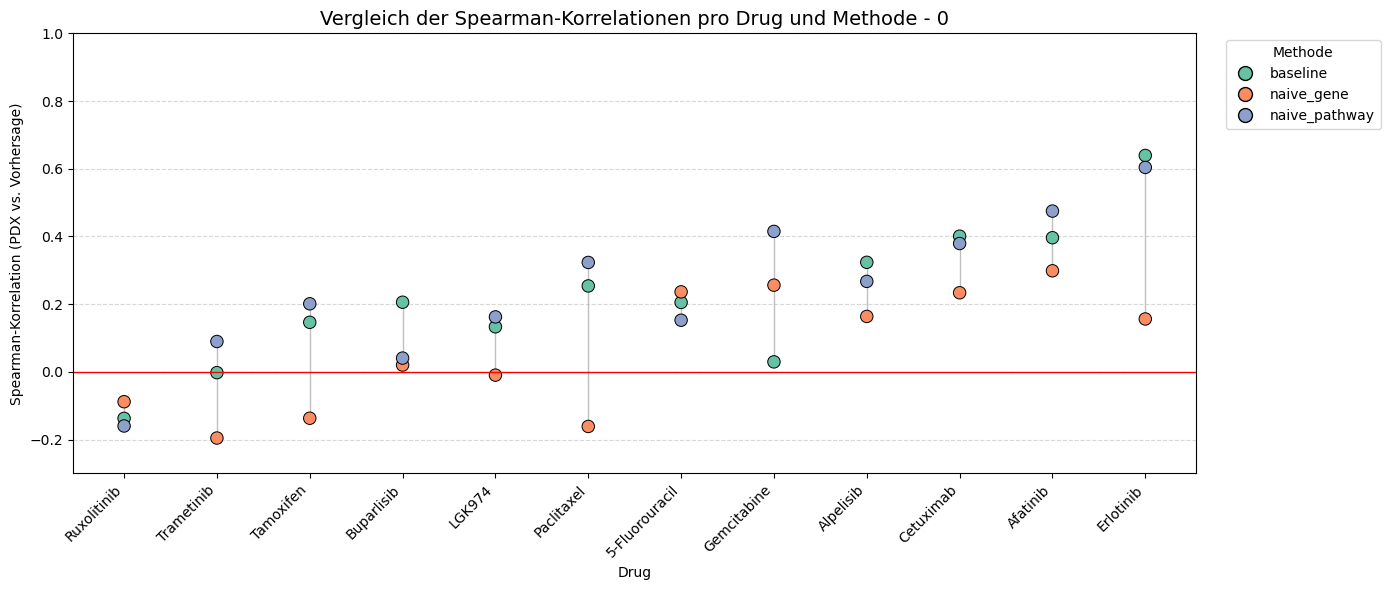

In [162]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# --- Lade Daten ---
preds_AUC_gene = pd.read_csv('./results/DA/preds_AUC_naiv_gene_level.csv', index_col=0)
preds_AUC_baseline = pd.read_csv('./results/DA/preds_AUC.csv', index_col=0)
preds_AUC_pathway = pd.read_csv('./results/preds_AUC_naiv_pathway_level.csv', index_col=0)

pdx_dataset = pd.read_csv('./data/PDX_MTL_DA.csv', index_col=0)
drugs_pdx = pdx_dataset.iloc[:, -12:]

# --- Gemeinsame Indizes finden ---
common_index = (
    preds_AUC_baseline.index
    .intersection(preds_AUC_gene.index)
    .intersection(preds_AUC_pathway.index)
    .intersection(drugs_pdx.index)
)

# --- Daten auf gemeinsame Indizes beschränken ---
preds_AUC_baseline = preds_AUC_baseline.loc[common_index]
preds_AUC_gene = preds_AUC_gene.loc[common_index]
preds_AUC_pathway = preds_AUC_pathway.loc[common_index]
drugs_pdx = drugs_pdx.loc[common_index]

# --- Ergebnisse sammeln ---
results = {
    'baseline': {},
    'naive_gene': {},
    'naive_pathway': {}
}

# --- Für jedes Medikament Korrelation berechnen ---
for drug in drugs_pdx.columns:
    y_true = drugs_pdx[drug]
    valid_idx = ~y_true.isna()
    
    if sum(valid_idx) < 2:
        results['baseline'][drug] = float('nan')
        results['naive_gene'][drug] = float('nan')
        results['naive_pathway'][drug] = float('nan')
        continue

    y_true_valid = y_true[valid_idx]
    
    # Baseline
    y_pred_baseline_valid = preds_AUC_baseline.loc[valid_idx, drug]
    if y_pred_baseline_valid.nunique() == 1:
        results['baseline'][drug] = float('nan')
    else:
        corr_baseline, _ = spearmanr(y_true_valid, y_pred_baseline_valid)
        results['baseline'][drug] = corr_baseline

    # Naive Gene-Level
    y_pred_naive_gene_valid = preds_AUC_gene.loc[valid_idx, drug]
    if y_pred_naive_gene_valid.nunique() == 1:
        results['naive_gene'][drug] = float('nan')
    else:
        corr_naive_gene, _ = spearmanr(y_true_valid, y_pred_naive_gene_valid)
        results['naive_gene'][drug] = corr_naive_gene

    # Naive Pathway-Level
    y_pred_naive_pathway_valid = preds_AUC_pathway.loc[valid_idx, drug]
    if y_pred_naive_pathway_valid.nunique() == 1:
        results['naive_pathway'][drug] = float('nan')
    else:
        corr_naive_pathway, _ = spearmanr(y_true_valid, y_pred_naive_pathway_valid)
        results['naive_pathway'][drug] = corr_naive_pathway

# --- In DataFrame konvertieren ---
results_df = pd.DataFrame(results)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Daten vorbereiten ---
results_melted = results_df.reset_index().melt(id_vars='index', 
                                                var_name='Methode', 
                                                value_name='Spearman-Korrelation')
results_melted.rename(columns={'index': 'Drug'}, inplace=True)

# --- Sortierung nach Mittelwert (optional für bessere Lesbarkeit) ---
drug_order = results_df.mean(axis=1).sort_values().index.tolist()
method_order = ['baseline', 'naive_gene', 'naive_pathway']

# --- Plot erstellen ---
plt.figure(figsize=(14, 6))

# Punkte + vertikale Verbindungslinien je Drug
for drug in drug_order:
    subset = results_melted[results_melted['Drug'] == drug]
    x_pos = [drug] * len(subset)
    y_vals = subset['Spearman-Korrelation'].values
    methods = subset['Methode'].values
    
    # Vertikale Linie von min bis max
    if len(y_vals) > 1:
        plt.plot([drug, drug], [np.min(y_vals), np.max(y_vals)],
                 color='gray', linewidth=1, alpha=0.5, zorder=1)

    # Punkte (farbig nach Methode)
    sns.scatterplot(x=x_pos,
                    y=y_vals,
                    hue=methods,
                    palette='Set2',
                    s=80,
                    edgecolor='black',
                    legend=False,
                    zorder=2)

# --- Hintergrundlinie bei 0 ---
plt.axhline(0, color='red', linestyle='-', linewidth=1)

# --- Plot-Einstellungen ---
plt.xticks(rotation=45, ha='right')
plt.ylabel('Spearman-Korrelation (PDX vs. Vorhersage)')
plt.xlabel('Drug')
plt.ylim(-0.3, 1.0)
plt.title('Vergleich der Spearman-Korrelationen pro Drug und Methode - 0', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# --- Saubere Legende generieren (einmalig aus allen Methoden) ---
from matplotlib.lines import Line2D
method_colors = sns.color_palette('Set2', n_colors=3)
custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=col,
                       markersize=10, markeredgecolor='black') for col in method_colors]
plt.legend(custom_lines, method_order, title='Methode',
           bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()



- baseline: 4 mal am besten
- naive_gene: 2 mal am besten
- naive_pathway: 7 mal am besten

- Baseline: bessere Anpassung an neue Domäne (PDX). passt AUC-Niveau bei höheren AUC schlecht an, aber behält richtige Rangordnung der Sensitvität (höhere Spearman-Korrelation mit echtem Drug Response in PDX) 
- Gene: Reproduktion von AUC-Niveaus, gut geeignet, wenn AUCs in neune Zelllinien vorhersagen willst 
- Pathways: Reproduktion von AUC-Niveaus, gut geeignet, wenn AUCs in neune Zelllinien vorhersagen willst, aber auch bei Anpassung gut geeignet 

- Wie stark und in welche Richtung der Zusammenhang zwischen den vorhergesagten AUC-Werten (Drug Sensitivity) und den tatsächlichen Labels (aus dem PDX-Datensatz) ist 

### Pathway, Gene_Interactions

In [20]:
# Gemeinsame Drugs
common_drugs = means_gene.index.intersection(means_baseline.index).intersection(means_drugs.index)

# Fehler berechnen
errors_gene = (means_gene[common_drugs] - means_drugs[common_drugs]).abs()
errors_baseline = (means_baseline[common_drugs] - means_drugs[common_drugs]).abs()

# Differenz der Fehler: positive Werte = Baseline besser
error_diff = errors_gene - errors_baseline

# Drugs mit kleinerem Fehler im Baseline-Modell
baseline_better = error_diff[error_diff > 0].sort_values(ascending=False)

print("📉 Drugs, bei denen das Baseline-Modell besser ist:")
print(baseline_better.head(10))  # Top 10 Fälle



📉 Drugs, bei denen das Baseline-Modell besser ist:
MG-132           0.060960
CDK9_5038        0.050703
Dinaciclib       0.040329
CDK9_5576        0.038792
Sabutoclax       0.033796
GNE-317          0.018127
Daporinad        0.018063
Bleomycin        0.007093
Staurosporine    0.006518
Vinblastine      0.002512
dtype: float64


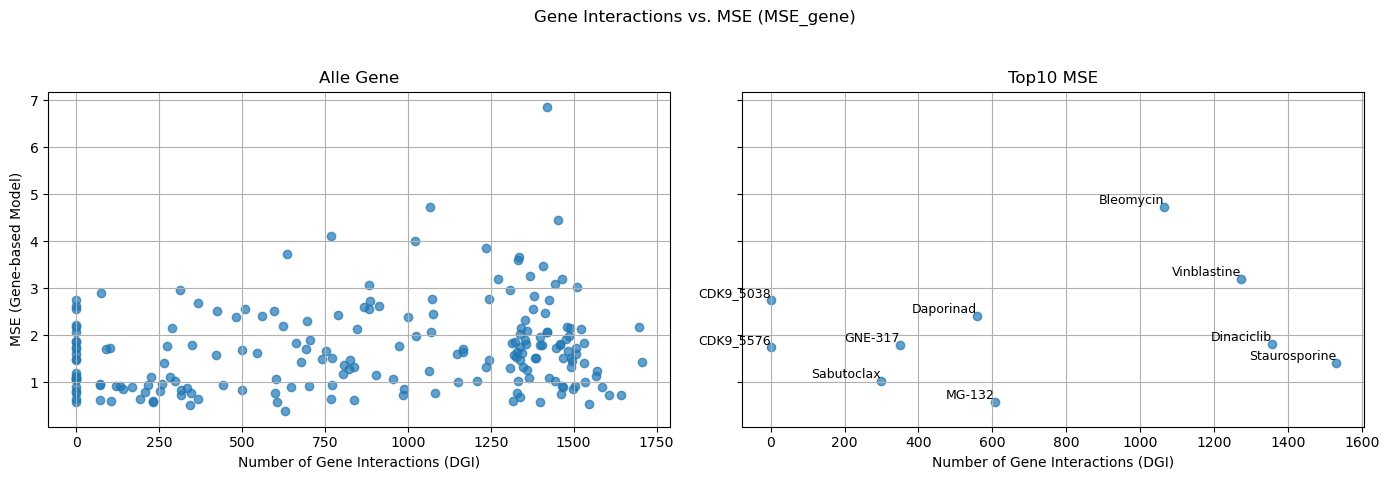

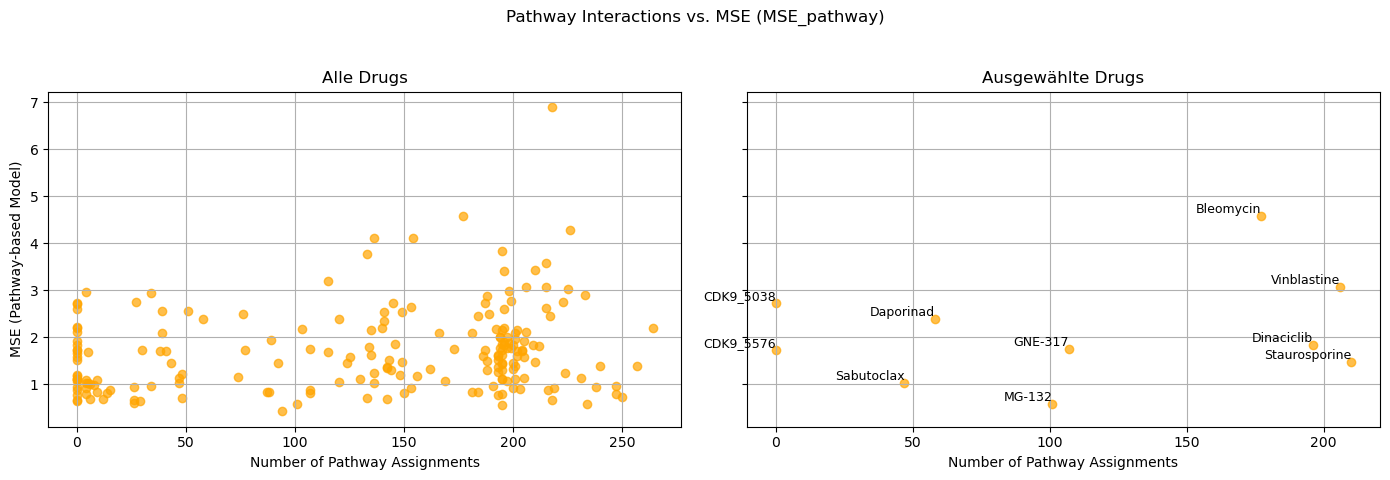

In [33]:
# Erstelle nebeneinanderliegende Subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Liste der gewünschten Drugs
selected_drugs_baseline = baseline_better.head(10).index.tolist()

# Filtere den DataFrame auf diese Drugs
df_selected = df_mse[df_mse.index.isin(selected_drugs_baseline)]


# Plot 1: Alle Daten
axes[0].scatter(df_mse["DGI_interactions"], df_mse["MSE_gene"], alpha=0.7)
axes[0].set_title("Alle Gene")
axes[0].set_xlabel("Number of Gene Interactions (DGI)")
axes[0].set_ylabel("MSE (Gene-based Model)")
axes[0].grid(True)

# Plot 2: Nur ausgewählte Drugs, mit Beschriftung
axes[1].scatter(df_selected["DGI_interactions"], df_selected["MSE_gene"], alpha=0.7)
for idx, row in df_selected.iterrows():
    axes[1].text(row['DGI_interactions'], row['MSE_gene'], str(idx),
                 fontsize=9, ha='right', va='bottom')
axes[1].set_title("Top10 MSE")
axes[1].set_xlabel("Number of Gene Interactions (DGI)")
axes[1].grid(True)

# Layout und Anzeige
plt.suptitle("Gene Interactions vs. MSE (MSE_gene)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot 1: Alle Daten
axes[0].scatter(df_mse["Pathway_interactions"], df_mse["MSE_pathway"], alpha=0.7, color="orange")
axes[0].set_title("Alle Drugs")
axes[0].set_xlabel("Number of Pathway Assignments")
axes[0].set_ylabel("MSE (Pathway-based Model)")
axes[0].grid(True)

# Plot 2: Nur ausgewählte Drugs, mit Beschriftung
axes[1].scatter(df_selected["Pathway_interactions"], df_selected["MSE_pathway"], alpha=0.7, color="orange")
for idx, row in df_selected.iterrows():
    axes[1].text(row['Pathway_interactions'], row['MSE_pathway'], str(idx),
                 fontsize=9, ha='right', va='bottom')
axes[1].set_title("Ausgewählte Drugs")
axes[1].set_xlabel("Number of Pathway Assignments")
axes[1].grid(True)

# Layout und Anzeige
plt.suptitle("Pathway Interactions vs. MSE (MSE_pathway)")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Um die Interpretierbarkeit des von TUGDA gelernten Merkmalsraums zu untersuchen, haben wir die Gewichte (Attributionen) jedes Gens mit der Methode Integrated Gradients (IG) berechnet

In [ ]:
# SHAPE: optinal 